In [2]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
df = pd.read_csv("../data/flight_data.csv")

df = df.drop(columns=['Unnamed: 0'])
df['departure_time'] = df['departure_time'].replace({
    "Early_Morning": "Early Morning",
    "Late_Night": "Late Night"
})
df['arrival_time'] = df['departure_time'].replace({
    "Early_Morning": "Early Morning",
    "Late_Night": "Late Night"
})
df['airline'] = df['airline'].replace({
    "GO_FIRST": "GO FIRST",
})
df['stops'] = df['stops'].replace({
    "zero": "0",
    "one": "1",
    "two_or_more": ">2",
})

df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Evening,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early Morning,0,Early Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early Morning,0,Early Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Morning,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,1,Morning,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,1,Afternoon,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early Morning,1,Early Morning,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early Morning,1,Early Morning,Hyderabad,Business,10.00,49,81585


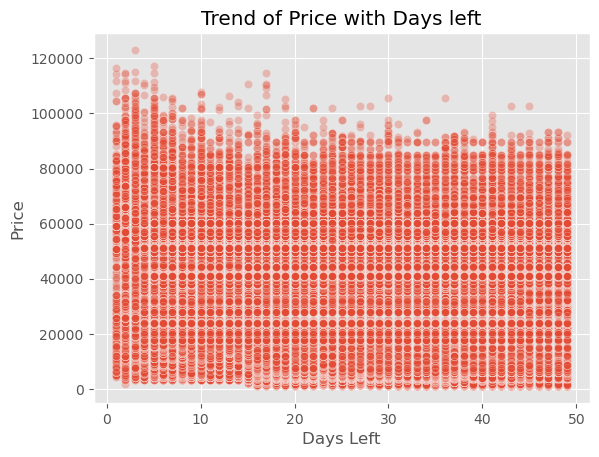

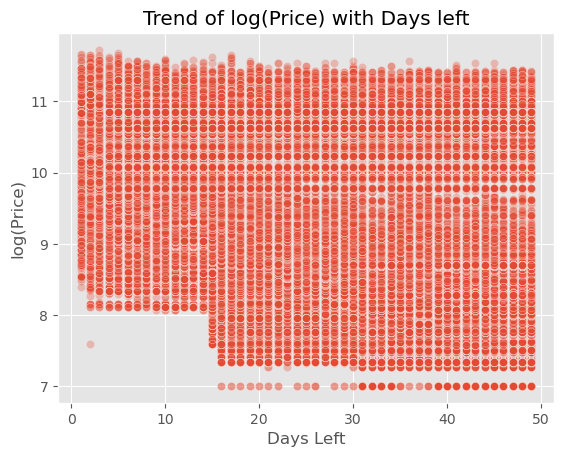

In [6]:
ax = sns.scatterplot(x=df['days_left'], y=df['price'], alpha=0.3)

ax.set_xlabel('Days Left')
ax.set_ylabel('Price')

ax.set_title('Trend of Price with Days left')

plt.show()

ax = sns.scatterplot(x=df['days_left'], y=np.log(df['price']), alpha=0.3)

ax.set_xlabel('Days Left')
ax.set_ylabel('log(Price)')

ax.set_title('Trend of log(Price) with Days left')

plt.show()


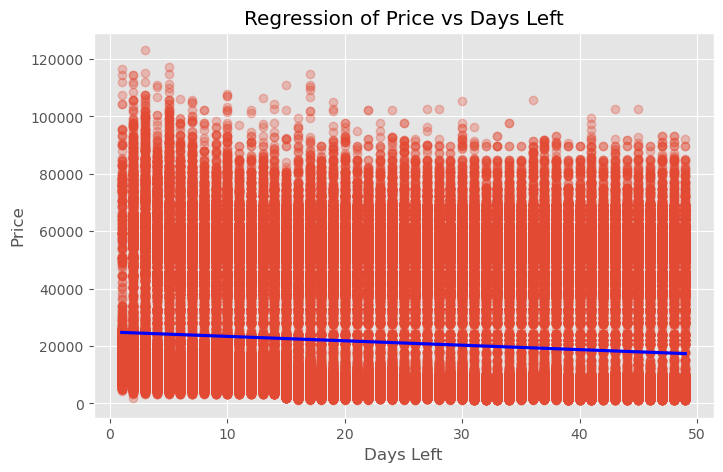

In [7]:
# Regression plot
plt.figure(figsize=(8,5))
sns.regplot(x=df['days_left'], y=df['price'], scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.title('Regression of Price vs Days Left')
plt.show()

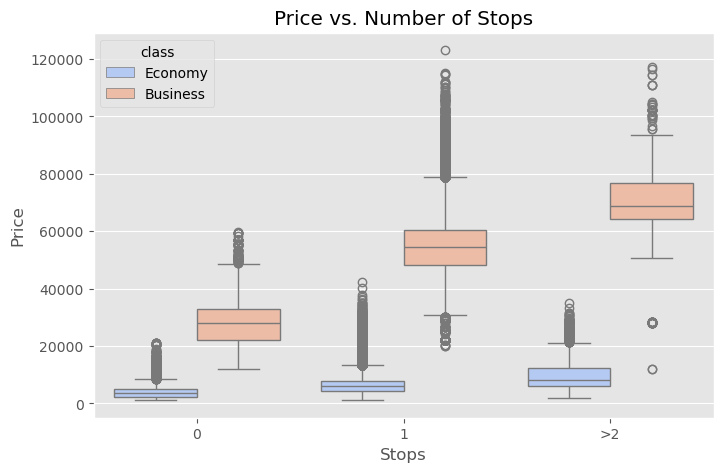

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["stops"], y=df["price"], data=df, hue="class", palette="coolwarm")
plt.title("Price vs. Number of Stops")
plt.xlabel("Stops")
plt.ylabel("Price")
plt.show()

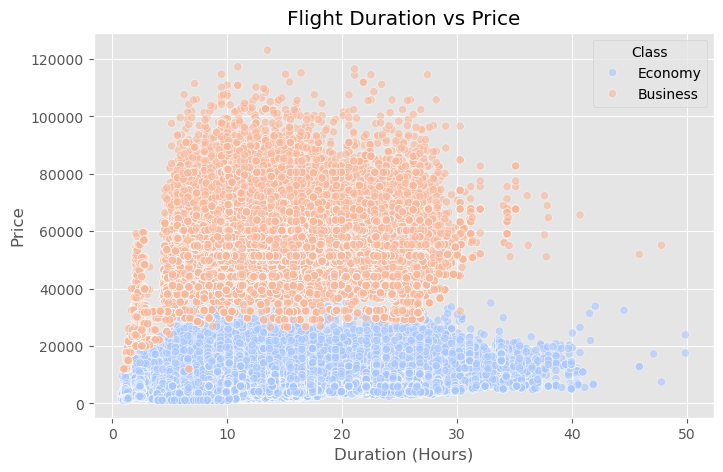

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['duration'], y=df['price'], hue=df['class'], alpha=0.6, palette="coolwarm")
plt.title("Flight Duration vs Price")
plt.xlabel("Duration (Hours)")
plt.ylabel("Price")
plt.legend(title="Class")
plt.show()

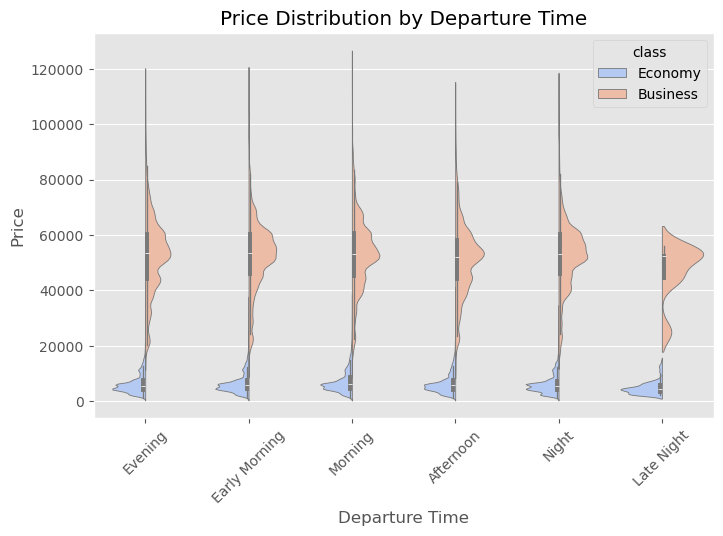

In [11]:
plt.figure(figsize=(8,5))
sns.violinplot(x=df['departure_time'], y=df['price'], hue=df['class'], split=True, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Price Distribution by Departure Time")
plt.xlabel("Departure Time")
plt.ylabel("Price")
plt.show()

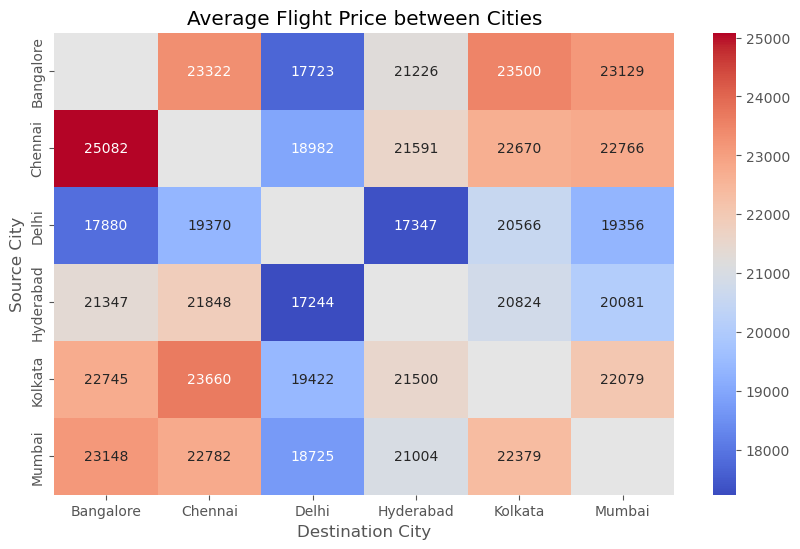

In [12]:
pivot_table = df.pivot_table(values='price', index='source_city', columns='destination_city', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Average Flight Price between Cities")
plt.xlabel("Destination City")
plt.ylabel("Source City")
plt.show()

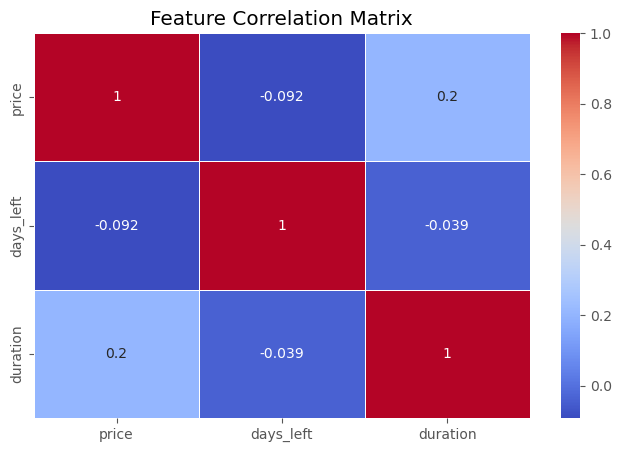

In [15]:
plt.figure(figsize=(8,5))

cols = ['price', 'days_left', 'duration']
corr_matrix = df[cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Feature Correlation Matrix")
plt.show()